# Homework #7 (B989006 권오승)

# Question #1. Learning a classfier for the 'Imbalanced Iris' Data Set

In [7]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

data = pd.read_csv('./hw7/iris_imbalanced.csv',header='infer')
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
for i in data.Name.values:
    if i == 'Iris-setosa':
        data.Name.replace(i,0,inplace=True)
    elif i == 'Iris-virginica':
        data.Name.replace(i,1,inplace=True)
    elif i == 'Iris-versicolor':
        data.Name.replace(i,2,inplace=True)
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 1-1
## Use DecisionTreeClassfier(with max_depth)

In [9]:
feature = data.drop('Name',axis=1)
label = data['Name']
dt = tree.DecisionTreeClassifier(max_depth=2,random_state=1124)
dt

DecisionTreeClassifier(max_depth=2, random_state=1124)

## 10-fold stratified cross validation & Compute the accuracy

In [10]:
# 10-fold stratified cross validation
score = cross_val_score(dt,feature,label,scoring='accuracy',cv=10)
# Compute the accuracy¶
print('mean score accuracy:', score.mean())

mean score accuracy: 0.9685714285714285


## plot the decision tree

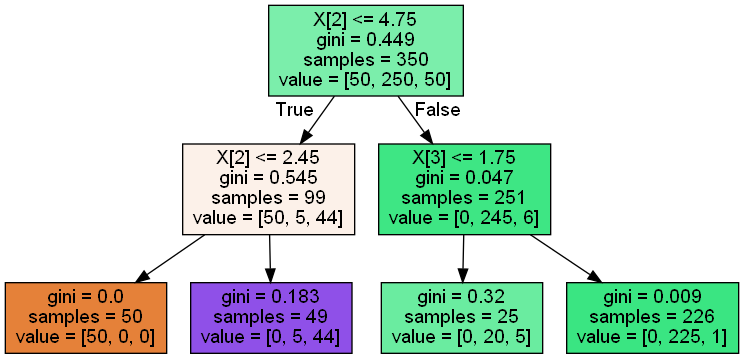

In [11]:
import pydotplus
from IPython.display import Image
dt.fit(feature,label)
dot_data = tree.export_graphviz(dt,filled=True, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# 1-2
## Remove the discretization & adjuest the max_depth parameter

In [12]:
data = pd.read_csv('./hw7/iris_imbalanced.csv',header='infer')
feature = data.drop('Name',axis=1)
label = data['Name']
dt = tree.DecisionTreeClassifier(random_state=1124)

In [13]:
# 10-fold stratified cross validation
score = cross_val_score(dt,feature,label,scoring='accuracy',cv=10)
# Compute the accuracy¶
print('mean score accuracy:', score.mean())

mean score accuracy: 0.9885714285714287


accuracy가 0.96에서 0.98로 증가하였다.
max_depth가 없는 모델은 default 값이 None으로,
None인 상태에서는 의사결정나무의 가지를 끝까지 확장하게 된다.

따라서, max_depth가 없는 모델의 정확도가 더 증가하게 된다.

# Question #2: Who should get a bank credit?

In [32]:
import pandas as pd
from tqdm import tqdm

names=[('Attribute '+str(i)) for i in range(1,21)]
names.append('Cost')
data = pd.read_csv("german.data",sep=' ',header=None,names=names)
data.head()

,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8,Attribute 9,Attribute 10,...,Attribute 12,Attribute 13,Attribute 14,Attribute 15,Attribute 16,Attribute 17,Attribute 18,Attribute 19,Attribute 20,Cost
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [40]:
for i in data.Cost.values:
    if i == 2:
        data.Cost.replace(i,0,inplace=True)

data.head()
X1 = data.drop('Cost',axis=1).select_dtypes(include=['int64', 'float64'])
y1 = data['Cost']

In [42]:
X1.info() # 데이터 결측치 확인 => 결측치 없음
y1.value_counts() # 1, 0 개수 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
Attribute 2     1000 non-null int64
Attribute 5     1000 non-null int64
Attribute 8     1000 non-null int64
Attribute 11    1000 non-null int64
Attribute 13    1000 non-null int64
Attribute 16    1000 non-null int64
Attribute 18    1000 non-null int64
dtypes: int64(7)
memory usage: 54.8 KB


1    700
0    300
Name: Cost, dtype: int64

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X1,y1,stratify=y1,test_size=0.2,random_state=1124)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(800, 7) (800,)
(200, 7) (200,)


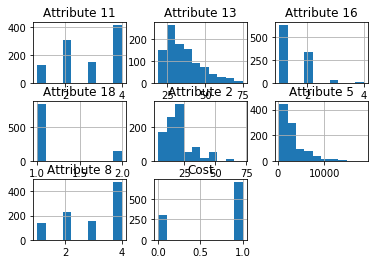

In [44]:
num_ix = data.select_dtypes(include=['int64', 'float64']).columns
subset = data[num_ix]
subset
ax = subset.hist()
plt.show()

In [45]:
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

# 1. Plot ROC curves
### 1-1 Decision Tree ROC

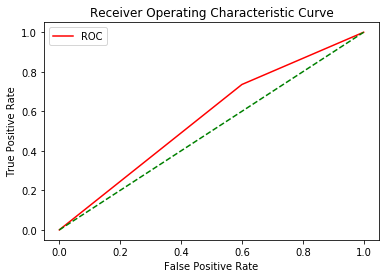

In [46]:
#Decision Tree

model = tree.DecisionTreeClassifier(random_state=1124)
model.fit(X_train, y_train)

prob = model.predict_proba(X_test)
prob = prob[:, 1]

fper, tper, thresholds = roc_curve(y_test, prob)
plot_roc_curve(fper,tper)

### 1-2 KNN ROC

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 142.16it/s]


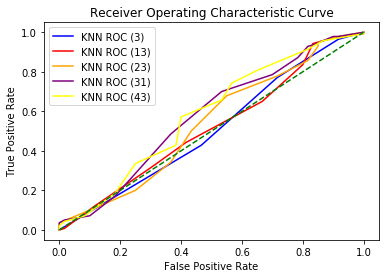

In [94]:
# KNN
color=['blue','red','orange','purple','yellow']
count=0
for k in tqdm([3,13,23,31,43]):
    model = KNeighborsClassifier(n_neighbors = k, p=2)
    model.fit(X_train.values, y_train)
    
    prob = model.predict_proba(X_test.values)
    prob = prob[:, 1]
    
    fper, tper, thresholds = roc_curve(y_test, prob)
    plt.plot(fper, tper, color=color[count], label=('KNN ROC ('+str(k)+')'))
    count+=1
    
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()
plt.show()

### 1-3Navie Bayes ROC

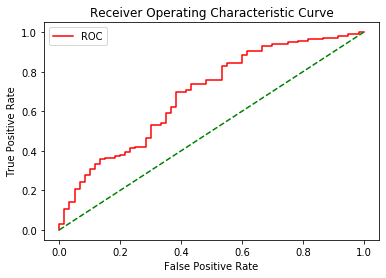

In [55]:
# Navie Bayes

model = GaussianNB()
model.fit(X_train, y_train)

prob = model.predict_proba(X_test)
prob = prob[:, 1]

fper, tper, thresholds = roc_curve(y_test, prob)
plot_roc_curve(fper,tper)

## 1-4 most promising Classifier
* Decision Tree
* KNN
* Navie Bayes

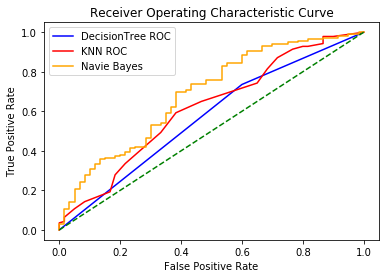

In [71]:
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
    
# Decision Tree
model = tree.DecisionTreeClassifier(random_state=1124)
model.fit(X_train, y_train)
prob = model.predict_proba(X_test)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
plt.plot(fper, tper, color='blue', label='DecisionTree ROC')

# KNN
model = KNeighborsClassifier(n_neighbors = 59, p=2)
model.fit(X_train.values, y_train)
prob = model.predict_proba(X_test.values)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
plt.plot(fper, tper, color='red', label='KNN ROC')

# Navie Bayes
model = GaussianNB()
model.fit(X_train, y_train)
prob = model.predict_proba(X_test)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
plt.plot(fper, tper, color='orange', label='Navie Bayes')

plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

#### Navie Bayes > KNN > Decision Tree 순으로 모델의 성능이 평가되었습니다.
#### 따라서 two most promising classification으로 "Navie Bayes"와 "KNN"을 선택하였습니다.

# 2. compute the accuracy and confusion matrix
### 2-1 Navie Bayes computing

In [72]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

### 2-1-1 accuracy

In [73]:
predY = nb.predict(X_test)
accuracy_score(y_test,predY)

0.745

### 2-1-2 confustion matrix

In [74]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predY = cross_val_predict(nb,X_train, y_train, cv=10)
cf = confusion_matrix(y_train,predY)
cf

array([[ 56, 184],
       [ 55, 505]], dtype=int64)

### 2-2 KNN computing

In [75]:
from sklearn.model_selection import cross_val_score

k_list = [i for i in range(1,100) if i%2 == 1]
cv_scores = []

for k in tqdm(k_list):
    # p1=> manhattan_distance, p2=> euclid_distance, p3=> minkowsi_distance
    classifier = KNeighborsClassifier(n_neighbors = k, p=2)
    scores = cross_val_score(classifier,X_train.values,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 19.23it/s]


In [77]:
best_k = [k_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
print('besk_k:',best_k, np.max(cv_scores))

besk_k: [31] 0.70625


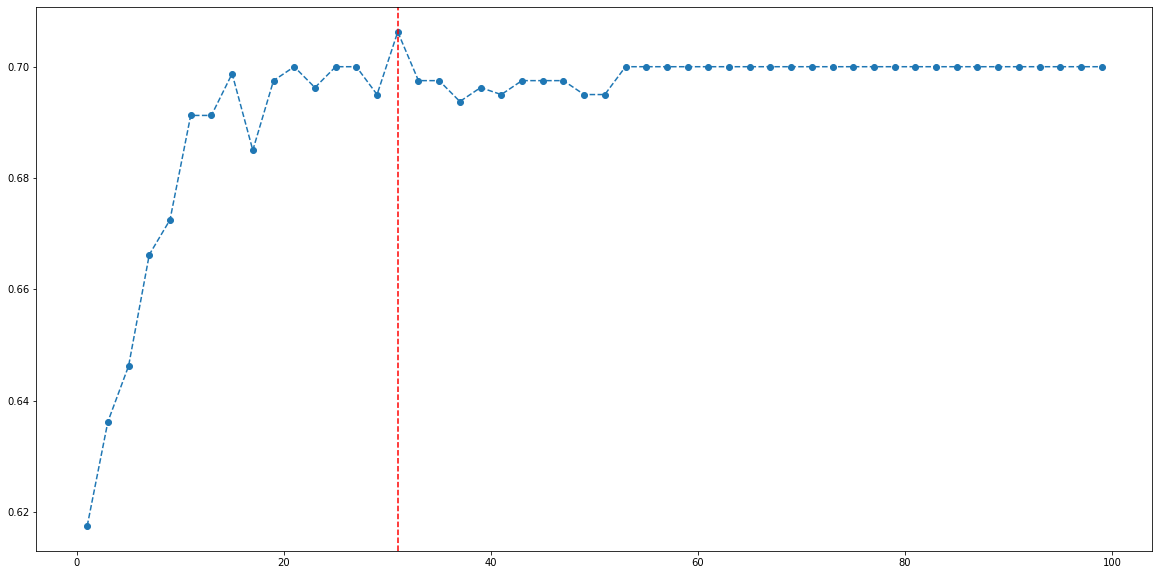

In [81]:
plt.figure(figsize=(20,10))

plt.plot(k_list,cv_scores,marker='o', linestyle='dashed')
plt.axvline(best_k,color='r',linestyle='--')

### 2-2-1 accuracy

In [90]:
knn = KNeighborsClassifier(n_neighbors = 31, p=2)
knn.fit(X_train.values,y_train)
predY = knn.predict(X_test.values)
accuracy_score(y_test,predY)

0.715

### 2-2-2 confusion matrix

In [91]:
predY = cross_val_predict(knn,X_train.values, y_train, cv=10)
cf = confusion_matrix(y_train,predY)
cf

array([[ 12, 228],
       [  7, 553]], dtype=int64)

# 3
## 3-1 percision & recall values for the class 'bad'

In [93]:
# 1, 0 개수 확인
y1.value_counts() # 1: 'good', 2: 'bad'

1    700
0    300
Name: Cost, dtype: int64